## Single Input Graphs

In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [2]:
# We now create an AgentState - shared data structure that keeps track of information as your application runs. 

class AgentState(TypedDict): # Our state schema
    name : str 


def compliment_node(state: AgentState) -> AgentState:
    """Simple node that compliments the user"""

    state['name'] = state["name"] + " you're doing an amazing job learning LangGraph!"

    return state 

In [3]:
graph = StateGraph(AgentState)

graph.add_node("compliment", compliment_node)

graph.set_entry_point("compliment")
graph.set_finish_point("compliment")

app = graph.compile()

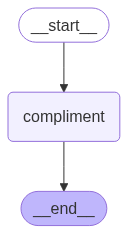

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"name": "Bob"})
print(result)
result["name"]

{'name': "Bob you're doing an amazing job learning LangGraph!"}


"Bob you're doing an amazing job learning LangGraph!"

## Multiple Input Graphs

In [7]:
from typing import TypedDict, List
from langgraph.graph import StateGraph 
import math

In [8]:
class AgentState(TypedDict):
    name: str 
    values: List[int]
    operation: str
    result: str 

In [9]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    if state["operation"] == "+":
        state["result"] = f"Hi {state['name']}, your answer is: {sum(state['values'])}"
    elif state["operation"] == "*":
        state["result"] = f"Hi {state['name']}, your answer is: {math.prod(state['values'])}"
    else:
        state["result"] = "Invalid!"

    return state

In [10]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor") 
graph.set_finish_point("processor") 

app = graph.compile() 

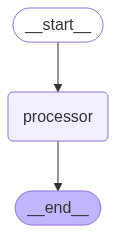

In [11]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
answers = app.invoke({"name": "Jack Sparrow","values": [1,2,3,4] , "operation": "*"})
print(answers)
answers["result"]

{'name': 'Jack Sparrow', 'values': [1, 2, 3, 4], 'operation': '*', 'result': 'Hi Jack Sparrow, your answer is: 24'}


'Hi Jack Sparrow, your answer is: 24'

## Sequential Graph

In [13]:
from typing import TypedDict 
from langgraph.graph import StateGraph

In [14]:
class AgentState(TypedDict):
    name: str
    age: str
    skills : list
    final_result: str

In [15]:
def first_node(state:AgentState) -> AgentState:
    """This node will greet the user"""

    state["final_result"] = f"{state["name"]} welcome to the system!"
    return state

def second_node(state:AgentState) -> AgentState:
    """This node will describe the user's age"""

    state["final_result"] = state["final_result"] + f" You are {state["age"]} years old!"
    return state


def third_node(state:AgentState) -> AgentState:
    """This node will list the user's skills in a formatted string"""
    state["final_result"] = state["final_result"] + f" You have skills in: {", ".join(state["skills"])}"

    return state

In [16]:
graph = StateGraph(AgentState)

graph.add_node("personalize", first_node)
graph.add_node("age_description", second_node)
graph.add_node("skills_description", third_node)

graph.set_entry_point("personalize")
graph.add_edge("personalize", "age_description")
graph.add_edge("age_description", "skills_description")
graph.set_finish_point("skills_description")
app = graph.compile()

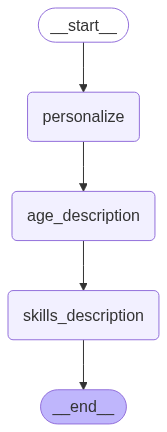

In [17]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
result = app.invoke({"name": "Linda", "age": 31, "skills":["Python", "Machine Learning", "LangGraph"]})
print(result)
result["final_result"]

{'name': 'Linda', 'age': 31, 'skills': ['Python', 'Machine Learning', 'LangGraph'], 'final_result': 'Linda welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, LangGraph'}


'Linda welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, LangGraph'